In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [14]:
df = pd.read_csv('vgsales-12-4-2019.csv')
df

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [16]:
df.isnull().sum()

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64

In [17]:
df.dropna(subset=['Year','Developer'],inplace=True)
df = df.reset_index(drop=True)
df['Year'] = pd.to_numeric(df['Year'], downcast='integer', errors='coerce')
df

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54794,55787,In the Valley of Gods,inthe-valley-of-gods,Adventure,NaN,PC,Campo Santo,Campo Santo,NaN,NaN,...,NaN,NaN,NaN,NaN,2019,11th Apr 19,http://www.vgchartz.com/game/224680/in-the-val...,1,NaN,games/boxart/full_8014753AmericaFrontccc.jpg
54795,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
54796,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
54797,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg


In [18]:
df.drop(['Last_Update', 'url','status','img_url','VGChartz_Score','basename','Rank'], axis = 1, inplace=True)
df

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore
0,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006,NaN
1,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985,NaN
2,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008,8.7
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017,NaN
4,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54794,In the Valley of Gods,Adventure,NaN,PC,Campo Santo,Campo Santo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
54795,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
54796,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN
54797,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN


In [19]:
def addTotalSales(df):
    if not pd.isna(df['Global_Sales']):
        return df['Global_Sales']
    elif not pd.isna(df['Total_Shipped']):
        return df['Total_Shipped']
    else:
        return df['NA_Sales'] + df['PAL_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [20]:
df['Total_Sales'] = df.apply(lambda x: addTotalSales(x), axis=1)

In [21]:
df

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,Total_Sales
0,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006,NaN,82.86
1,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985,NaN,40.24
2,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008,8.7,37.14
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017,NaN,36.60
4,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009,8.8,33.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54794,In the Valley of Gods,Adventure,NaN,PC,Campo Santo,Campo Santo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
54795,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
54796,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN
54797,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN


In [22]:
df.describe()

,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,Total_Sales
count,6532.000000,328.000000,1827.000000,19374.000000,12956.000000,13163.000000,7035.000000,15493.000000,54799.000000,756.000000,21201.000000
mean,7.214590,8.272256,1.887258,0.366258,0.275695,0.155563,0.110522,0.044801,2005.658662,7.488492,0.497330
std,1.453208,1.392177,4.195693,0.833740,0.512929,0.399593,0.184743,0.129661,8.356382,1.375553,1.527633
min,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,2.600000,0.000000
25%,6.400000,7.800000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000,6.900000,0.040000
50%,7.500000,8.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000,7.900000,0.140000
75%,8.300000,9.200000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000,8.500000,0.420000
max,10.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000,9.600000,82.860000


In [23]:
df.describe(include=object)

,Name,Genre,ESRB_Rating,Platform,Publisher,Developer
count,54799,54799,23519,54799,54799,54799
unique,36591,20,8,74,3069,7884
top,Plants vs. Zombies,Misc,E,PC,Unknown,Unknown
freq,20,9391,10757,10572,3906,4725


# ESRB Rating

In [166]:
esrbToCount = df[['Name', 'ESRB_Rating']]
esrbToCount = esrbToCount.groupby(["ESRB_Rating"], as_index=False)['Name'].nunique()

esrbToCount

,ESRB_Rating,Name
0,AO,17
1,E,7196
2,E10,1577
3,EC,42
4,KA,3
5,M,1707
6,RP,226
7,T,3770


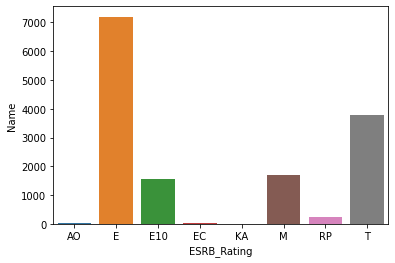

In [167]:
esrbtoCount_plot =  sns.barplot(data = esrbToCount, x = "ESRB_Rating", y = "Name")

# ESRB Rating to Total Sales

In [126]:
esrbToTotal = df[['Name', 'ESRB_Rating', 'Total_Sales']]

esrbToTotal

,Name,ESRB_Rating,Total_Sales
0,Wii Sports,E,82.86
1,Super Mario Bros.,NaN,40.24
2,Mario Kart Wii,E,37.14
3,PlayerUnknown's Battlegrounds,NaN,36.60
4,Wii Sports Resort,E,33.09
...,...,...,...
54794,In the Valley of Gods,NaN,NaN
54795,Indivisible,NaN,NaN
54796,Lost Ember,RP,NaN
54797,Lost Ember,RP,NaN


In [119]:
esrbToTotal['Total_Sales'].describe()

count    21201.000000
mean         0.497330
std          1.527633
min          0.000000
25%          0.040000
50%          0.140000
75%          0.420000
max         82.860000
Name: Total_Sales, dtype: float64

(0.0, 100.0)

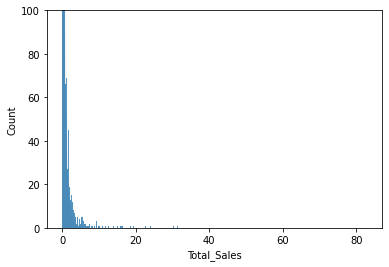

In [54]:
histo = sns.histplot(data=esrbToTotal, x  = 'Total_Sales')
plt.ylim(0, 100)

## Checking sales of AO and KA

In [164]:
esrbToTotal_a = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('AO') == True]

esrbToTotal_a = esrbToTotal_a.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_a

,ESRB_Rating,Total_Sales
0,AO,0.0


In [165]:
esrbToTotal_a = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('KA') == True]

esrbToTotal_a = esrbToTotal_a.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_a

,ESRB_Rating,Total_Sales
0,KA,0.0


## Plot ESRB Ratings to Sales


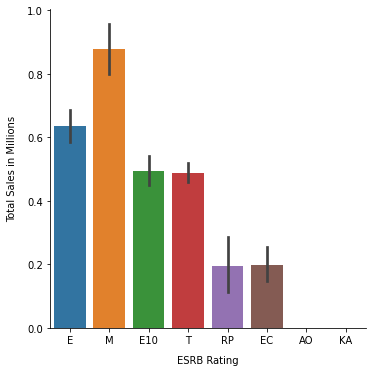

In [134]:
ESRB_sales_plot = sns.catplot(y = 'Total_Sales', x = 'ESRB_Rating', kind='bar', data=esrbToTotal)
ESRB_sales_plot.set_axis_labels("ESRB Rating", "Total Sales in Millions", labelpad=10)

# Genre to Total Sales

In [64]:
df['Genre'].describe()

count     54799
unique       20
top        Misc
freq       9391
Name: Genre, dtype: object

In [73]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Shooter', 'Role-Playing',
       'Puzzle', 'Misc', 'Party', 'Simulation', 'Action',
       'Action-Adventure', 'Fighting', 'Strategy', 'Adventure', 'Music',
       'MMO', 'Sandbox', 'Visual Novel', 'Board Game', 'Education'],
      dtype=object)

In [84]:
genre_sales =  df.groupby(['Genre'], as_index=False)['Total_Sales'].sum()
genre_sales

,Genre,Total_Sales
0,Action,1496.12
1,Action-Adventure,235.81
2,Adventure,505.78
3,Board Game,0.31
4,Education,0.42
5,Fighting,512.63
6,MMO,39.56
7,Misc,904.15
8,Music,62.17
9,Party,52.35


In [95]:
total_per_genre = genre_sales['Total_Sales']

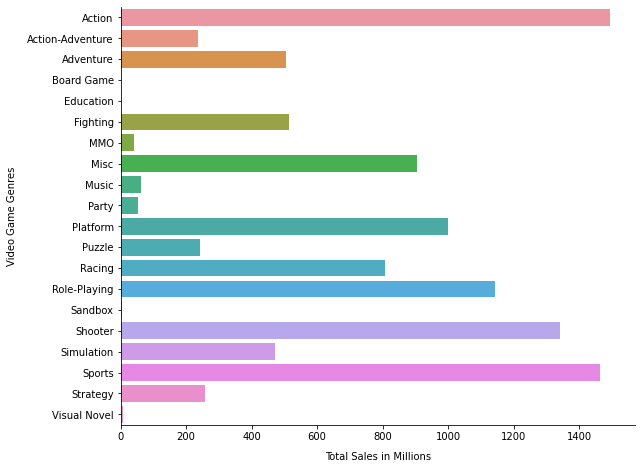

In [105]:
genre_sales_plot = sns.catplot(y = 'Genre', x = 'Total_Sales', data=genre_sales, orient='h', kind='bar')
genre_sales_plot.fig.set_size_inches(10.5, 6.5)
genre_sales_plot.set_axis_labels("Total Sales in Millions", "Video Game Genres", labelpad=10)